In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display (img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
logo = cv.imread('face.png')

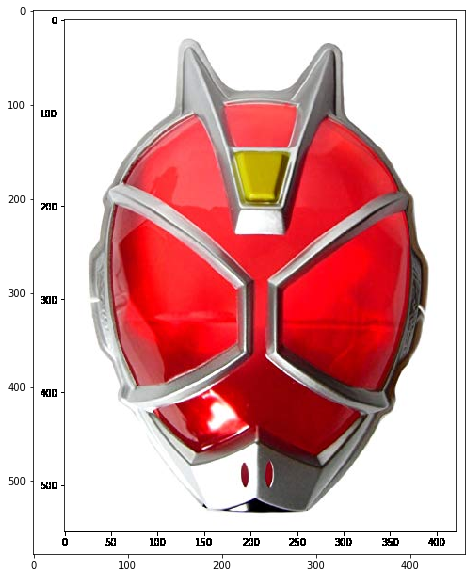

In [5]:
display(logo)

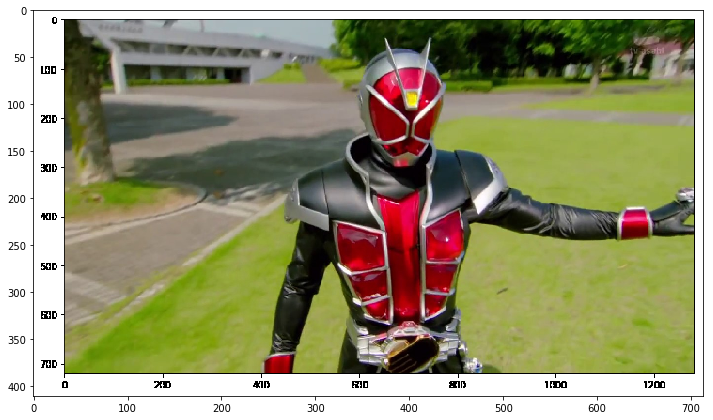

In [6]:
spanduk = cv.imread('body.png')
display(spanduk)

In [7]:
orb = cv.ORB_create()

In [8]:
kp1, des1 = orb.detectAndCompute(logo, None)
kp2, des2 = orb.detectAndCompute(spanduk, None)

In [9]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck= True)

In [10]:
matches = bf.match(des1,des2)

In [11]:
matches = sorted(matches, key=lambda x:x.distance)

In [12]:
logo_matches = cv.drawMatches(logo, kp1, spanduk, kp2, matches[:25], None, flags=2)

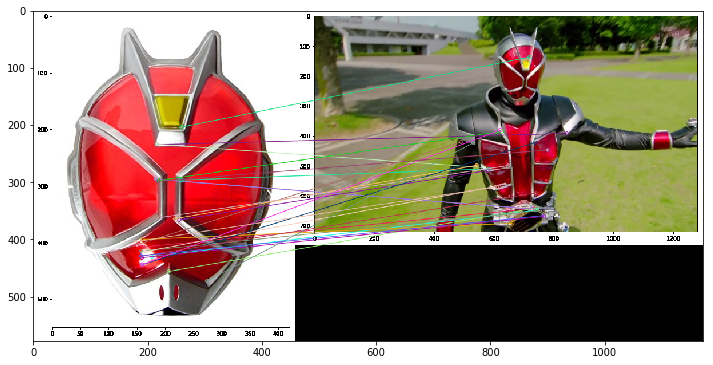

In [13]:
display(logo_matches)

In [14]:
sift = cv.xfeatures2d.SIFT_create()

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


In [15]:
kp1, des1 = sift.detectAndCompute(logo, None)
kp2, des2 = sift.detectAndCompute(spanduk, None)

NameError: name 'sift' is not defined

In [16]:
bf = cv.BFMatcher()

In [17]:
matches = bf.knnMatch(des1,des2,k=2)

In [18]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.80*match2.distance:
        good.append([match1])

In [29]:
len(good)

45

In [30]:
len(matches)

612

In [31]:
sift_matches = cv.drawMatchesKnn(logo,kp1,spanduk,kp2,good,None,flags=2)

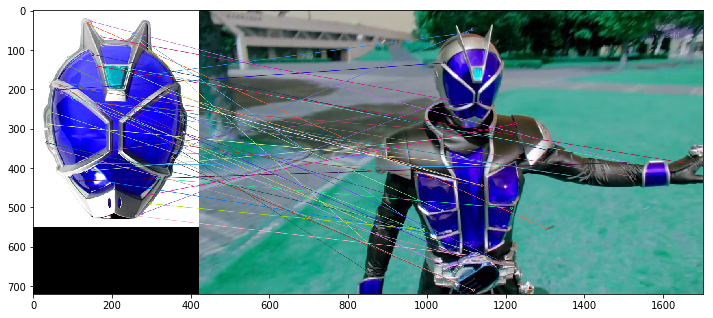

In [32]:
display(sift_matches)